In [ ]:
from __future__ import print_function, division    # Python 2 and 3 are now very similar
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Plots now appear in the notebook.
%matplotlib notebook
plt.style.use('ggplot')                            # Matplotlib style sheet - nicer plots!
plt.rcParams['figure.figsize'] = 12, 8             # Slightly bigger plots by default

In [ ]:
from obspy import *
import numpy as np
import matplotlib.pyplot as plt


### LOAD FOG #######
folder = r'/Volumes/bay_mobil/Stromboli2022/BS3/BS/HJ3.D/'
file= r'/XX.BS3..HJ3.D.2022.256'

pathFOGz = folder+file
print(pathFOGz)

FOGZ= read(pathFOGz)
print(FOGZ)

fogZ=np.array(FOGZ[0])
print(np.shape(fogZ))


### LOAD RAMP #######
folder = r'/Volumes/bay_mobil/BS3_mseed/'
file= r'/XX.BS3..HY3.D.2022.297'


pathRAMPz = folder+file
print(pathRAMPz)

RAMPZ= read(pathRAMPz)
print(RAMPZ)

rampZ=np.array(RAMPZ[0])
print(np.shape(rampZ))



In [ ]:
### COMPUTE USEFULL VALUE
nb_val = len(rampZ)
DiffRampZ=np.diff(rampZ)
SortedDiffRamp = np.sort(DiffRampZ)
plt.plot(SortedDiffRamp)
plt.title("SortedDiffRamp")

In [ ]:
RampMean = np.mean(SortedDiffRamp[int(nb_val*2/10):int(nb_val*8/10)]) # average between 20% and 80% of sorted diff ramp
# to get the average of the ramp slope WITHOUT effect of falls
print(RampMean)


moyFogZ=np.mean(fogZ)
print(moyFogZ)

ratio = moyFogZ/ RampMean
print(ratio)

### COMPUTATION OF INFERRED RAMP
corr = 1

start = 200000
stop  = 220000

angZ = np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)

In [ ]:
### graphic to test and understand
plt.figure(8)
plt.plot(fogZ[start:stop])
plt.plot(rampZ[start:stop])
plt.show()

In [ ]:
plt.figure(2)
plt.plot(rampZ[start:stop],fogZ[start:stop],'.')
plt.show()

In [ ]:
net = 22 # value found with several try
plt.figure(30)
plt.plot(fogZ[start:stop])
plt.plot(rampZ[start:stop])
plt.plot(angZ[net:-1],'k')
plt.show()

In [ ]:
plt.figure(31) # zoom at start : OK
plt.plot(fogZ[start:start+2000])
plt.plot(rampZ[start:start+2000])
plt.plot(angZ[net:net+2000],'k')

In [ ]:
plt.figure(32)  # zoom at end : BAD
plt.plot(fogZ[start+18000:stop])
plt.plot(rampZ[start+18000:stop])
plt.plot(angZ[net+18000:-1],'k')
plt.show()

In [ ]:
# we need a more accurate ratio, found good value for corr

corr = 0.99783
angZ=np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)

plt.figure(7)
plt.plot(rampZ[start:stop-net-1],angZ[net:-1],'.')
plt.show()

In [ ]:
corr = 0.99793 # value found with several try
angZ=np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)

plt.figure(8)
plt.plot(rampZ[start:stop-net-1],angZ[net:-1],'.')
plt.show()

In [ ]:
corr = 0.99803
angZ=np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)

plt.figure(9)
plt.plot(rampZ[start:stop-net-1],angZ[net:-1],'.')
plt.show()

In [ ]:
# we check here that a proper model can be found using our inferred ramp
# and that the model itself can be found to identif the value of corr using only fog

plt.figure(100)
plt.plot(rampZ[start:stop],fogZ[start:stop],'.')
plt.show()

# And here we try to infer the ramp directly from the data

In [2]:
from __future__ import print_function, division    # Python 2 and 3 are now very similar
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Plots now appear in the notebook.
%matplotlib notebook
plt.style.use('ggplot')                            # Matplotlib style sheet - nicer plots!
plt.rcParams['figure.figsize'] = 12, 8             # Slightly bigger plots by default

from obspy import *
import numpy as np


### LOAD FOG #######
folder = r'/Volumes/bay_mobil/Stromboli2022/BS3/BS/HJ3.D/'
file= r'/XX.BS3..HJ3.D.2022.257'

pathFOGz = folder+file
print(pathFOGz)

FOGZ= read(pathFOGz)
print(FOGZ)

fogZ=np.array(FOGZ[0])
print(np.shape(fogZ))

/Volumes/bay_mobil/Stromboli2022/BS3/BS/HJ3.D//XX.BS3..HJ3.D.2022.257
1 Trace(s) in Stream:
XX.BS3..HJ3 | 2022-09-14T00:00:00.059000Z - 2022-09-15T00:00:00.084000Z | 200.0 Hz, 17280006 samples
(17280006,)


<IPython.core.display.Javascript object>


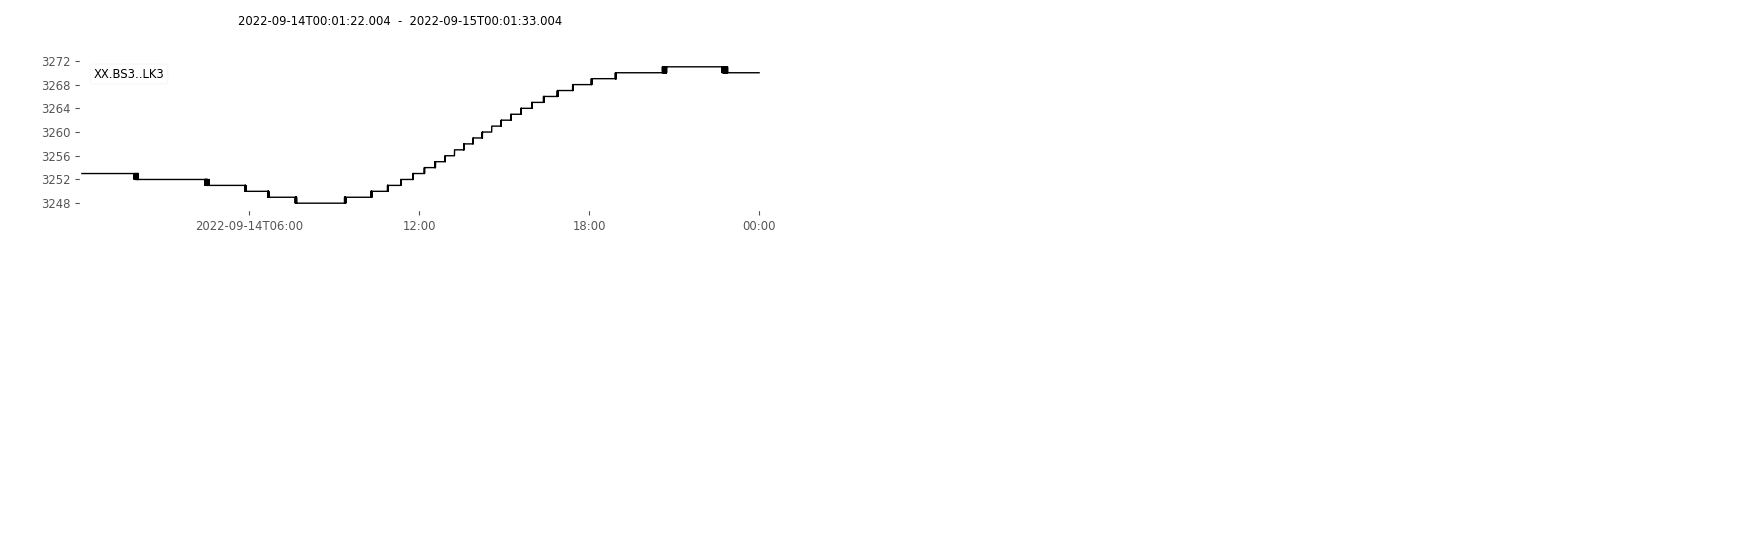

<IPython.core.display.Javascript object>


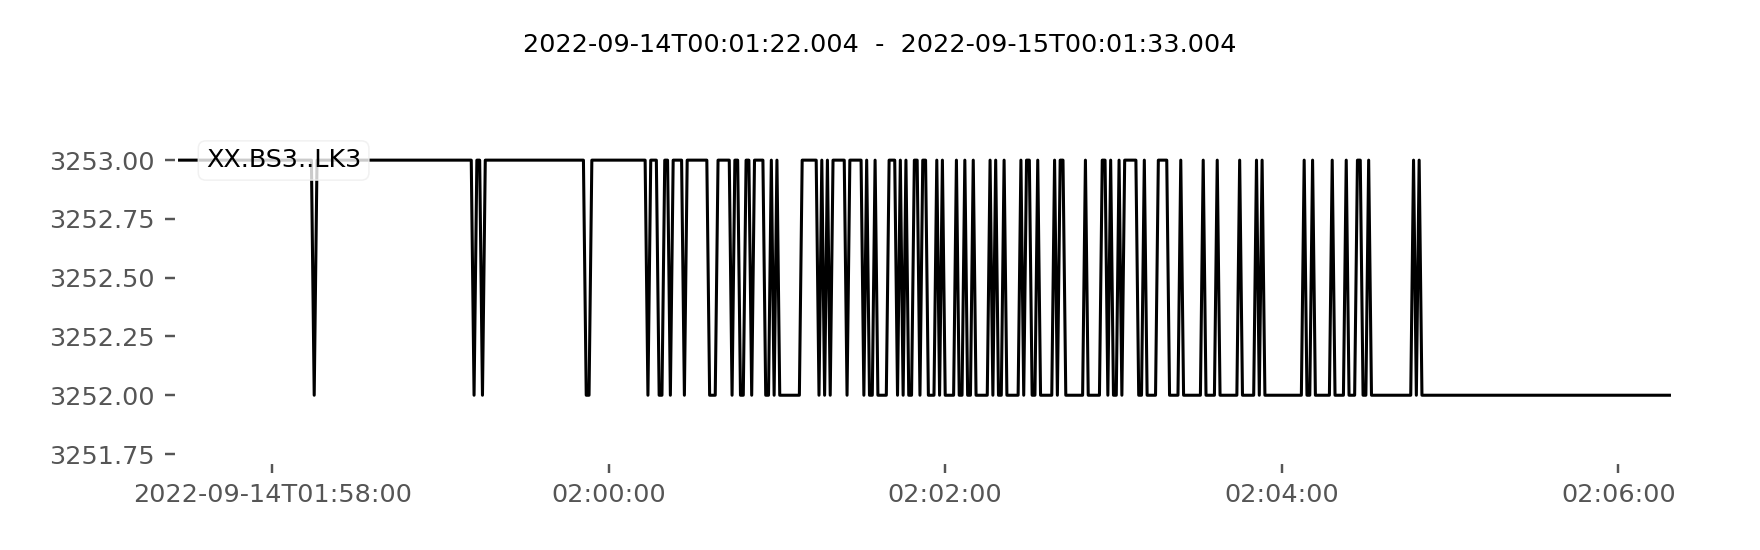

In [20]:
folder = r'/Volumes/bay_mobil/Stromboli2022/BS3/BS/LK3.D/'
pathFOGzT = folder+r'/XX.BS3..LK3.D.2022.257'
FOGZT= read(pathFOGzT)
FOGZT.plot()

In [15]:
FOGZT.integrate()


1 Trace(s) in Stream:
XX.BS3..LK3 | 2022-09-14T00:01:22.004000Z - 2022-09-15T00:01:33.004000Z | 1.0 Hz, 86412 samples

<IPython.core.display.Javascript object>


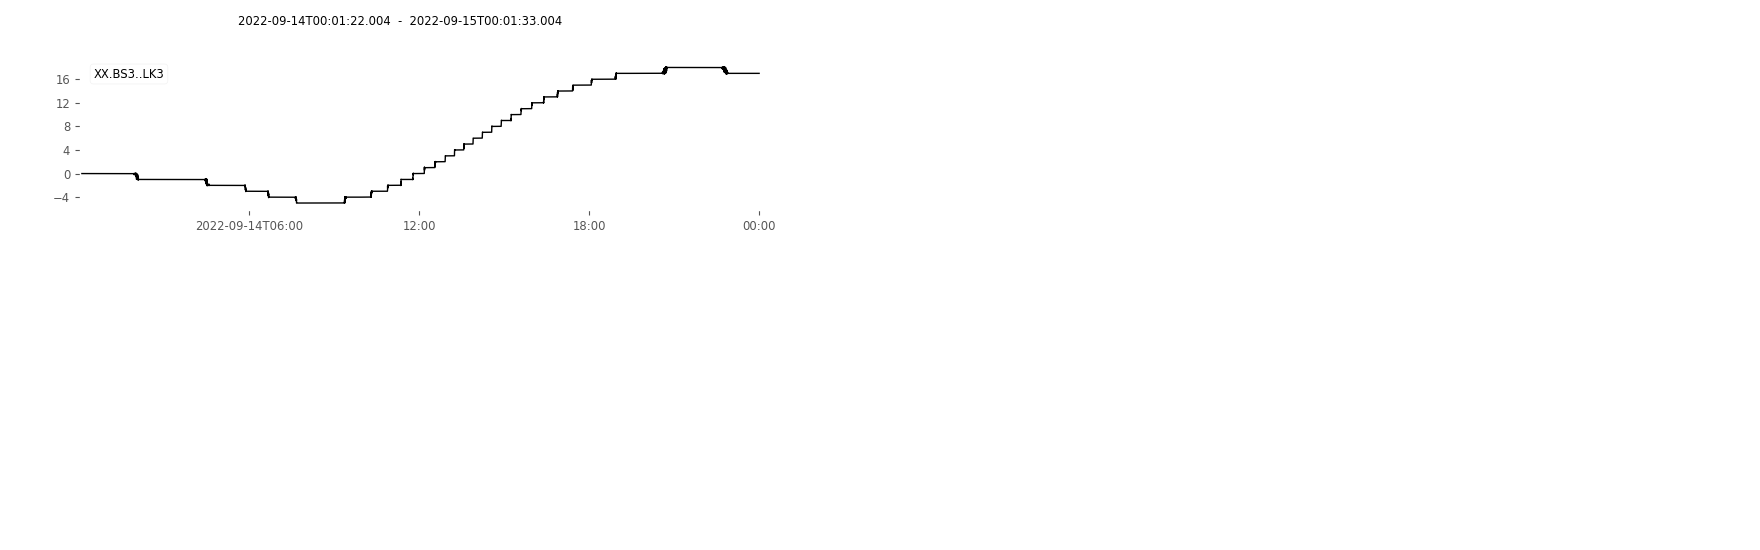

<IPython.core.display.Javascript object>


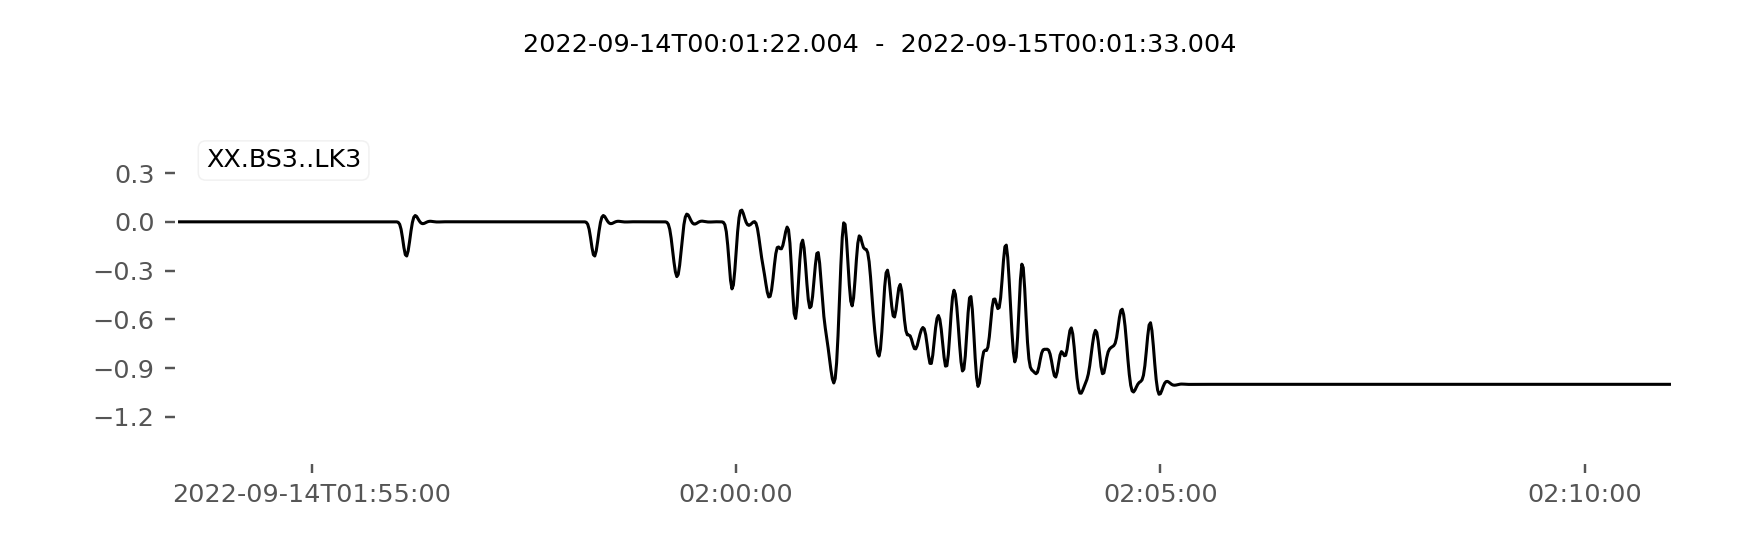

In [18]:
FOGZT.filter("lowpass",freq=0.1)
FOGZT.differentiate()

FOGZT.plot()

In [ ]:
def f(x,start,stop,ratio):

    corr = x
    #ratio = -80.081890845
    #start = 100000;stop = 320000
    angZ=np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)
    fogZz = fogZ[start:stop]
    angz_c = angZ[fogZz>48000]
    fogZ_c = fogZz[fogZz>48000]
    model = np.polyfit(angz_c,fogZ_c,deg=2)
    predict = np.polyval(model,angz_c)
    residuum = ((fogZ_c-predict)**2).sum()
    
    return(residuum)


In [ ]:
from scipy import optimize
lw = [0.997] * 1
up = [0.9995] * 1
ratio = -80.081890845
window = 200*200 #(10 mintes segments)
start = 0
stop = start + window
ava = 0
i = 0
while stop < len(fogZ):
    i += 1
    minimum = optimize.dual_annealing(f,bounds=list(zip(lw,up)),args=(start,stop,ratio),maxiter=2000)
    print(minimum.x[0])
    corr = minimum.x[0]
    ava += corr
    angZ=np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)
    plt.figure()
    plt.plot(angZ,fogZ[start:stop],'.')
    plt.show()
    start = stop
    stop = start + window
                                  

In [ ]:
ava/i

In [ ]:
#We try it with an avaverage
corr = 0.998745064065
#ava/i
angZ=np.mod(np.cumsum(fogZ)/(ratio*corr),32767)
#spl.set_smoothing_factor(0.5)
#xs = np.linspace(0, 30000, 30000)
#plt.figure(101)residuals, rank, singular_values, rcond,pol = np.polyfit(angz_c,fogZ_c,deg=3,full=True)
plt.figure(111)
plt.plot(angZ,fogZ,'.')
plt.show()

In [ ]:
corr = 0.9992
angZ=np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)

plt.figure(102)
plt.plot(angZ,fogZ[start:stop],'.')
plt.show()

In [ ]:
Good_ratio =  ratio*0.9992   # computed only between start and stop
print('the acurate ratio is ',Good_ratio)

# test if this ratio works elsewhere

corr = 0.9992

start = 300000
stop  = 320000
angZ=np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)

plt.figure(200)
plt.plot(angZ,fogZ[start:stop],'.')
plt.show()

In [ ]:
# and if it works everywhere

corr = 0.9992

start = 000
stop  = -1
angZ=np.mod(np.cumsum(fogZ[start:stop])/(ratio*corr),32767)

plt.figure(201)
plt.plot(angZ,fogZ[start:stop],'.')
plt.show()

# not that bad, small variation to catch to be very fine
